# Grid Maker

THIS FUNCTION HAS BEEN CHANGED / ADAPTED FROM JOSH ROBIN'S FUNCTION - Credit goes to him.

The following functions are designed to take in a single set of coordinates and create a grid of equidistant points with dimensions of your choosing. From this we can use twitterscraper to pull tweets from a limited area around each of these points, and then be able to determine the level of danger at each of these areas specifically.

In [1]:
import math
import matplotlib.pyplot as plt

In [16]:
# this code has been adapted from stackoverflow.com
# takes in a set of coordinates, a bering, and a distance
# returns a new set of coordinates that is the specified distance away in the direction of the bering
def adj_grid_point(lat, lon, brng, d):
    
    R = 6378.1 #Radius of the Earth

    lat1 = math.radians(lat) #Current lat point converted to radians
    lon1 = math.radians(lon) #Current long point converted to radians

    # calculating the new latitude based on the distance and bering provided
    lat2 = math.asin(math.sin(lat1)*math.cos(d/R) +
         math.cos(lat1)*math.sin(d/R)*math.cos(brng))
    
    # calculating the new longitude based on the distance and bering provided
    lon2 = lon1 + math.atan2(math.sin(brng)*math.sin(d/R)*math.cos(lat1),
                 math.cos(d/R)-math.sin(lat1)*math.sin(lat2))

    # converting the latitude and longitude back from radians to degrees
    lat2 = math.degrees(lat2)
    lon2 = math.degrees(lon2)
    
    # returning the new set of coordinates
    return lat2, lon2

In [17]:
# testing the function above
adj_grid_point(34.0422, -118.2437, 1.57, 20)

(34.04215276757178, -118.02687819151413)

In [18]:
# this function returns a line of equidistant coordinate points in the form of a list
# takes in a starting latitude and longitude
# creates a line with a set number of points (length) at a set distance apart
# the line will be created from South to North
def grid_centers_line(lat, lon, length, distance):
    
    # setting the starting point for the line
    start = (lat, lon)
    
    # creating a list to store the coordinate points in the line
    # the first item in the list will be the starting point
    coordinates = [start]
    
    # repeat this process for the length of the line, excluding the starting point
    for i in range(1, length):
        
        # create a new point at the given distance Northbound from the previous point
        new_coordinates = adj_grid_point(lat, lon, 0, distance)
        # add this new point to the coordinate list
        coordinates.append(new_coordinates)
        # reset the point to be the new coordinates so that the line keeps moving up
        lat, lon = new_coordinates
    
    # return the final list of coordinates
    return coordinates

In [19]:
# testing the function above (5 points in a line going North, each 20km apart)
grid_centers_line(34.0422, -118.2437, 5, 20)

[(34.0422, -118.2437),
 (34.22186409906738, -118.2437),
 (34.401528198134756, -118.2437),
 (34.58119229720214, -118.2437),
 (34.76085639626952, -118.2437)]

In [20]:
# this function returns a grid of equidistant coordinate points in the form of a list
# takes in a starting latitude and longitude
# creates a grid of points of any dimension (length, width)
# the points can be any distance apart from each other
def make_grid(lat, lon, length, width, distance):
    
    # creating a list to store the grid of coordinates
    # the first items in the list will be generating using the line generating function
    # the line will start from the given latitude and longitude and continue North
    # the number of points will be the length given and they will be separated by the distance given
    grid = grid_centers_line(lat, lon, length, distance)
    
    # repeat this process for the width of the grid, excluding the first line
    for i in range(1, width):
        
        # find the point at the given distance East from the starting point of the previous line
        start = adj_grid_point(lat, lon, 1.5708, distance)
        # create a new line of points going North from the new starting point
        # add the points to the grid of coordinates list
        grid.extend(grid_centers_line(start[0], start[1], length, distance))
        # reset the latitude and longitude of the starting point so the grid keeps building to the East
        lat, lon = start
    
    # return the final grid of coordinates list
    return grid

In [23]:
# testing the function above (a 5 by 5 grid of coordinate points, each 20 km apart)
grid = make_grid(34.0422, -118.2437, 5, 5, 20)
gridlist = list(grid)
gridlist

[(34.0422, -118.2437),
 (34.22186409906738, -118.2437),
 (34.401528198134756, -118.2437),
 (34.58119229720214, -118.2437),
 (34.76085639626952, -118.2437),
 (34.042009036745036, -118.02687849022567),
 (34.221673135812416, -118.02687849022567),
 (34.4013372348798, -118.02687849022567),
 (34.581001333947164, -118.02687849022567),
 (34.76066543301454, -118.02687849022567),
 (34.04181807485741, -117.81005746865448),
 (34.22148217392479, -117.81005746865448),
 (34.401146272992165, -117.81005746865448),
 (34.580810372059545, -117.81005746865448),
 (34.760474471126926, -117.81005746865448),
 (34.04162711433712, -117.5932369352783),
 (34.22129121340449, -117.5932369352783),
 (34.400955312471865, -117.5932369352783),
 (34.58061941153924, -117.5932369352783),
 (34.76028351060663, -117.5932369352783),
 (34.04143615518414, -117.37641689008902),
 (34.22110025425151, -117.37641689008902),
 (34.40076435331889, -117.37641689008902),
 (34.58042845238627, -117.37641689008902),
 (34.760092551453646, -117

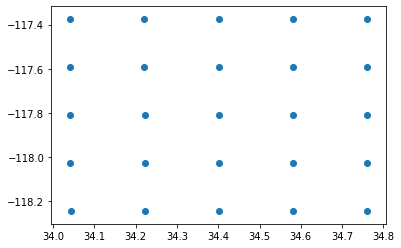

In [22]:
# visualizing the grid as a final test

# setting lists for plotting x and y
x = []
y = []

# populating the lists from the test grid created above
for coordinate in grid:
    x.append(coordinate[0])
    y.append(coordinate[1])

# using a scatterplot to visualize the results
plt.scatter(x, y);